In [ ]:
''' 
Used for non linear relationship , fits polynomial curve 

Equation : y=b0​+b1​x+b2​x^2+⋯+bd​x^d

still a linear model implemented by creating polynominal + linear regression features


Cons:
High degree → overfitting
Sensitive to outliers
For smaller values it tries to underfit and higher values of degree it trie to overfit
'''

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


In [3]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X ** 2 +0.9 *X + 2 + np.random.rand(200,1)

<function matplotlib.pyplot.show(close=None, block=None)>

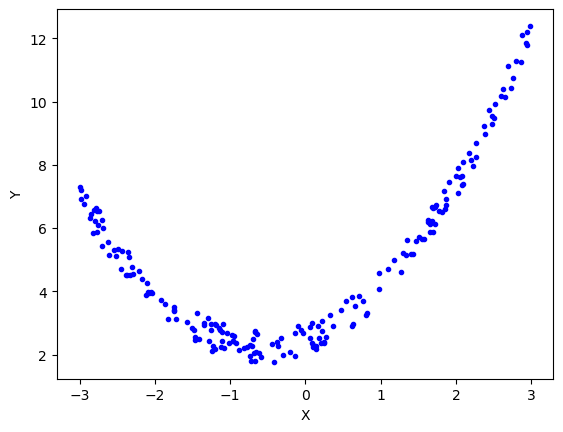

In [5]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [9]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)

In [11]:
r2_score(y_test,y_pred)

0.06495902322245539

<function matplotlib.pyplot.show(close=None, block=None)>

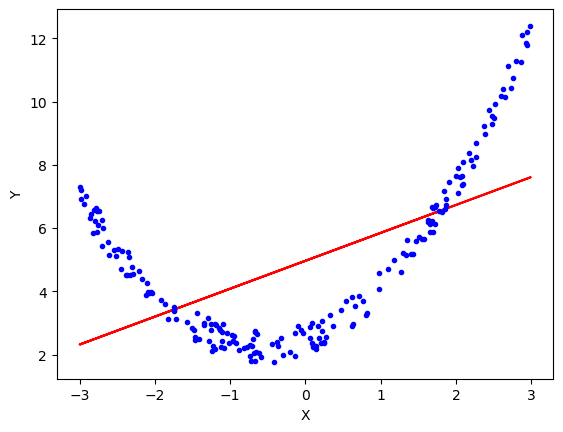

In [12]:
plt.plot(X_train,lr.predict(X_train),color = 'r')
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

In [ ]:
#Applying polynomial Linear Regression 
#degree 2 
poly = PolynomialFeatures(degree=2) 
'''
if we do include bias=False then we dont get intercept like we get this [1.         1.86988567 3.49647241],
will get only 1.86988567 3.49647241 
'''

X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.transform(X_test)

In [14]:
print(X_train[0])
print(X_train_transform[0])

[1.86988567]
[1.         1.86988567 3.49647241]


In [15]:
lr = LinearRegression()
lr.fit(X_train_transform,y_train)

LinearRegression()

In [16]:
y_pred1 = lr.predict(X_test_transform)
r2_score(y_test,y_pred1)

0.9853438045862428

In [17]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.88479683 0.79278065]]
[2.5000346]


In [18]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

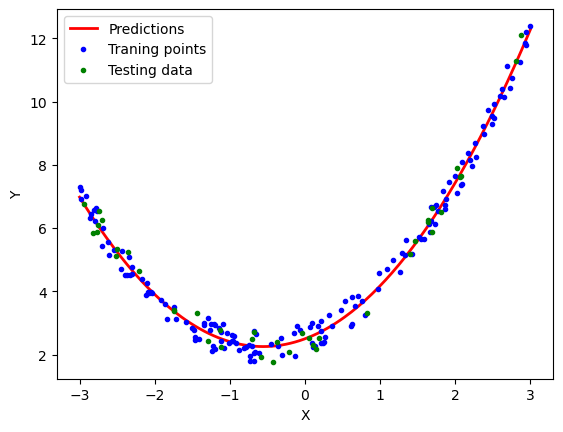

In [ ]:
plt.plot(X_new,y_new,'r-',linewidth = 2, label = 'Predictions')
plt.plot(X_train,y_train, 'b.',label = 'Traning points')
plt.plot(X_test,y_test,'g.',label = 'Testing data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [24]:
# making a function so we can see how this shows overfitting on high degree
def polynomial_regression(degree):
    X_new1 = np.linspace(-3,3,100).reshape(100,1)
    X_new_poly1 = poly.transform(X_new1)
    
    poly_features = PolynomialFeatures(degree=degree,include_bias=False)
    std = StandardScaler()
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline([
        ("poly_features",poly_features),
        ("std_scaler",std),
        ("linear_regression",lin_reg)
    ])
    
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new1)
    plt.plot(X_new1,y_newbig,'r',label = "Degree" + str(degree), linewidth = 2)
    
    plt.plot(X_train,y_train, 'b.',label = 'Traning points')
    plt.plot(X_test,y_test,'g.',label = 'Testing data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc = 'upper left')
    plt.axis([-3,3,0,10])
    plt.show()
    
    
    

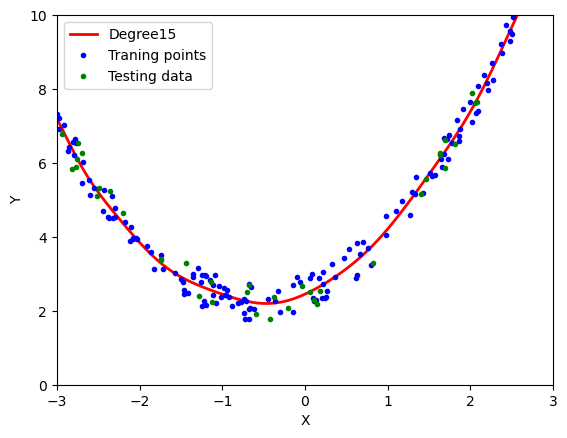

In [ ]:
polynomial_regression(15)

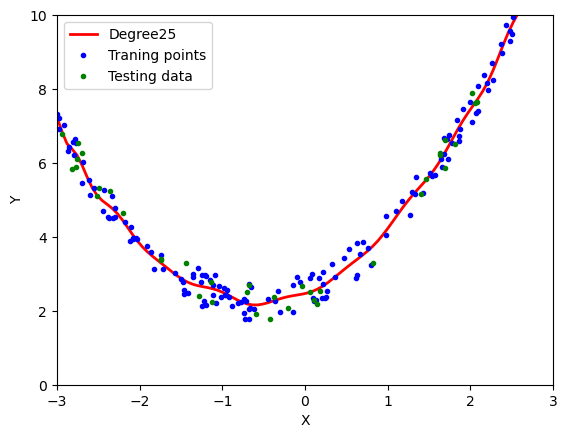

In [27]:
polynomial_regression(25)

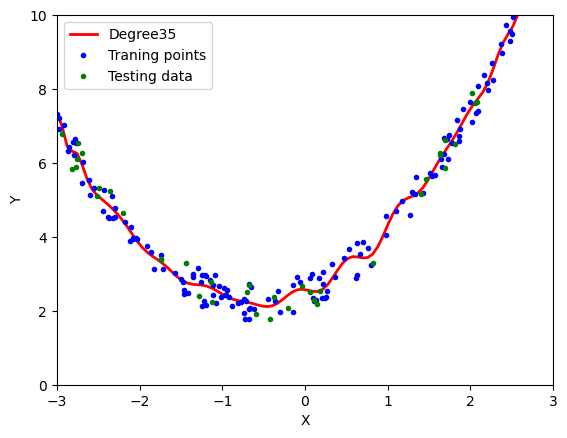

In [28]:
polynomial_regression(35)